  <div style="background-color:Bisque; color:Lavender; padding:30px;">
    
<h1 style="text-align: center; color: green;" markdown="1">Statistical Analysis of Commuting Behavior Across U.S. Regions </h1>
<h2 style="text-align: center; color: purple;" markdown="1"> Max Migdon, Reese Yang，Lucas Li </h2>
     </div>

## Introduction and Motivation

Commuting is a daily necessity that is often shaped by education, income, and social status, all of which can influence transportation choices and travel time. Higher-income and well-educated individuals often have more flexibility in selecting housing and commute modes, while lower-income workers face longer, less efficient commutes due to affordability constraints. We hope to further understand these disparities as this knowledge is crucial for policymakers and urban planners seeking to improve transit equity and economic mobility. In our final project we hope to explore how these socioeconomic factors shape commuting behaviors and a broader impact on urban accessibility.



## Literature Review or Related Literature (Include a short draft here at least to motiovate what your are doing)
Source 1: https://journals.sagepub.com/doi/10.1177/03611981241233285?icid=int.sj-abstract.citing-articles.1

Source 2: https://link.springer.com/article/10.1007/s11116-020-10124-w

Source 3: https://www.economist.com/1843/2016/11/28/rethinking-the-commute

Source 4: https://graphics.wsj.com/urban-income-polarization/

Source 5: https://www.economist.com/graphic-detail/2017/01/31/how-colleges-affect-social-mobility-in-america

Education, income, and social status play significant roles in shaping commuting behaviors, influencing both the mode of transportation and the duration of commutes. Higher levels of education are often associated with greater job opportunities, which can lead to longer commutes as individuals seek employment in high-paying urban centers (Sage Journals, Springer). Income levels, on the other hand, affect commuting flexibility—wealthier individuals have greater access to private vehicles or premium public transit options, while lower-income workers may face longer, less efficient commutes due to reliance on public transportation and carpooling (WSJ, Economist). Social status and neighborhood income distribution further impact commuting efficiency, with wealthier areas having better infrastructure and transportation networks, whereas lower-income regions often experience inadequate transit options, reinforcing economic disparities (Economist, WSJ). Ultimately, these factors create a commuting landscape where privilege affords convenience, while socioeconomic constraints can exacerbate commuting burdens.

In [38]:
# Import required packages
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
from stargazer.stargazer import Stargazer
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import HTML, display
pd.set_option('display.float_format', '{:.2f}'.format)

In [39]:
data = pd.read_excel("/Users/billli/Desktop/commuting_behavior_study.xlsx")
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,HHINCOME,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME
0,2023,202301,1,2023010000113,6,2023000000011,1,1517.30,280201,3,9999999,0,1,6,2,86,6,63,0,0
1,2023,202301,2,2023010000180,27,2023000000021,1,269.50,10001,3,9999999,0,1,27,1,60,6,63,0,0
2,2023,202301,3,2023010000181,47,2023000000031,1,1580.90,40201,4,9999999,0,1,47,1,20,7,71,0,0
3,2023,202301,4,2023010000250,11,2023000000041,1,290.60,270201,3,9999999,0,1,11,2,13,2,26,0,0
4,2023,202301,5,2023010000340,57,2023000000051,1,1517.30,280201,4,9999999,0,1,57,1,18,6,65,0,0


## Data Cleaning
During data cleaning, we looked into the codes of each variable via IPUMS to remove or recode variables as needed.

In [41]:
# Remove all rows with Household income of 9999999, meaning N/A
data = data[data["HHINCOME"] != 9999999]
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,HHINCOME,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME
3709,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,1,69,2,54,7,71,0,0
3710,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,2,54,2,35,4,40,0,0
3711,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,3,67,1,14,3,30,0,0
3712,2023,202301,3711,2023000000130,111,2023000037111,1,157.90,90001,1,3000,1,1,111,2,82,6,63,0,0
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,111500,3,1,126,2,40,7,71,1,75


In [42]:
# Remove rows where VEHICLES == 0 (N/A)
data = data[data["VEHICLES"] != 0]
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,HHINCOME,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME
3709,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,1,69,2,54,7,71,0,0
3710,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,2,54,2,35,4,40,0,0
3711,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,9,3,67,1,14,3,30,0,0
3712,2023,202301,3711,2023000000130,111,2023000037111,1,157.90,90001,1,3000,1,1,111,2,82,6,63,0,0
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,111500,3,1,126,2,40,7,71,1,75


In [43]:
# Recode 9 (No vehicles) as 0
data["VEHICLES"] = data["VEHICLES"].replace(9, 0)
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,HHINCOME,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME
3709,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,0,1,69,2,54,7,71,0,0
3710,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,0,2,54,2,35,4,40,0,0
3711,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,11000,0,3,67,1,14,3,30,0,0
3712,2023,202301,3711,2023000000130,111,2023000037111,1,157.90,90001,1,3000,1,1,111,2,82,6,63,0,0
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,111500,3,1,126,2,40,7,71,1,75


In [44]:
#Drop all 999 rows in EDUCD as 999 is missing data.
data = data[data["EDUCD"] != 999]

# Dictionary mapping EDUCD codes to years of education
education_years = {
    0: 0, 1: 0, 2: 0,  # N/A or no schooling
    10: 1, 11: 1, 12: 0, 13: 2, 14: 1, 15: 2, 16: 3, 17: 4,
    20: 6, 21: 5, 22: 5, 23: 6, 24: 7, 25: 7, 26: 8,
    30: 9, 40: 10, 50: 11, 60: 12,
    61: 12, 62: 12, 63: 12, 64: 12, 65: 13,
    70: 13, 71: 13, 80: 14, 81: 14, 82: 14, 83: 14,
    90: 15, 100: 16, 101: 16,
    110: 17, 111: 18, 112: 19, 113: 20,
    114: 18, 115: 20, 116: 21,
    999: None  # Missing
}

# Apply the mapping to the EDUCD column
data["EDUC_YEARS"] = data["EDUCD"].map(education_years)
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS
3709,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,...,0,1,69,2,54,7,71,0,0,13.00
3710,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,...,0,2,54,2,35,4,40,0,0,10.00
3711,2023,202301,3710,2023000000061,69,2023000037101,1,78.10,200001,1,...,0,3,67,1,14,3,30,0,0,9.00
3712,2023,202301,3711,2023000000130,111,2023000037111,1,157.90,90001,1,...,1,1,111,2,82,6,63,0,0,12.00
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,1,126,2,40,7,71,1,75,13.00


In [45]:
# Recoded CARPOOL, which conviently translates to dummy variables
data = data[data['CARPOOL'] != 0]
data['CARPOOL'] = data['CARPOOL'].replace({1: 0, 2: 1})
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,1,126,2,40,7,71,0,75,13.00
3714,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,2,146,1,41,6,63,0,75,12.00
3715,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,3,167,2,20,6,65,0,15,13.00
3716,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,2,1,76,2,36,5,50,0,10,11.00
3717,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,2,2,89,1,40,6,63,0,10,12.00


In [46]:
# Clean for TRANTIME: Removing 0 = N/A, 888 = Supressed Data
data=data[data['TRANTIME'] !=888]
data=data[data['TRANTIME'] !=000]
data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,VEHICLES,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,1,126,2,40,7,71,0,75,13.00
3714,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,2,146,1,41,6,63,0,75,12.00
3715,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,3,167,2,20,6,65,0,15,13.00
3716,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,2,1,76,2,36,5,50,0,10,11.00
3717,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,2,2,89,1,40,6,63,0,10,12.00


In [47]:
# Define mapping from STATEFIP to region
region_map = {
    # Northeast
    9: 'Northeast', 23: 'Northeast', 25: 'Northeast', 33: 'Northeast',
    34: 'Northeast', 44: 'Northeast', 50: 'Northeast', 36: 'Northeast', 42: 'Northeast',
   
    # Midwest
    17: 'Midwest', 18: 'Midwest', 26: 'Midwest', 39: 'Midwest', 55: 'Midwest',
    19: 'Midwest', 20: 'Midwest', 27: 'Midwest', 29: 'Midwest', 31: 'Midwest',
    38: 'Midwest', 46: 'Midwest',
   
    # South
    1: 'South', 5: 'South', 10: 'South', 11: 'South', 12: 'South', 13: 'South',
    21: 'South', 22: 'South', 24: 'South', 28: 'South', 37: 'South', 40: 'South',
    45: 'South', 47: 'South', 48: 'South', 51: 'South', 54: 'South',
   
    # West
    2: 'West', 4: 'West', 6: 'West', 8: 'West', 15: 'West', 16: 'West', 30: 'West',
    32: 'West', 35: 'West', 41: 'West', 49: 'West', 53: 'West', 56: 'West',
}


# Apply the mapping
data["REGION"] = data["STATEFIP"].map(region_map)
data.head()


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,PERNUM,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS,REGION
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,1,126,2,40,7,71,0,75,13.00,South
3714,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,2,146,1,41,6,63,0,75,12.00,South
3715,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,3,167,2,20,6,65,0,15,13.00,South
3716,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,1,76,2,36,5,50,0,10,11.00,South
3717,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,2,89,1,40,6,63,0,10,12.00,South


In [48]:
# Apply the region name first
data["REGION_NAME"] = data["STATEFIP"].map(region_map)


# To assist in make graphs for the US, we also map region names to numeric labels (Northeast as 0)
region_numeric = {
    'Midwest': 0,
    'Northeast': 1,
    'South': 2,
    'West': 3
}


# Apply numeric encoding
data["REGION"] = data["REGION_NAME"].map(region_numeric)


data.head()


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,PERWT,SEX,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS,REGION,REGION_NAME
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,126,2,40,7,71,0,75,13.00,2,South
3714,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,146,1,41,6,63,0,75,12.00,2,South
3715,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,167,2,20,6,65,0,15,13.00,2,South
3716,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,76,2,36,5,50,0,10,11.00,2,South
3717,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,89,1,40,6,63,0,10,12.00,2,South


In [49]:
# Create dummy variables, dropping the baseline region Midwest
data = pd.get_dummies(data, columns=["REGION_NAME"], drop_first=True)
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [50]:
data.head(10)

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS,REGION,REGION_NAME_Northeast,REGION_NAME_South,REGION_NAME_West
3713,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,40,7,71,0,75,13.00,2,0,1,0
3714,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,41,6,63,0,75,12.00,2,0,1,0
3715,2023,202301,3712,2023000000328,126,2023000037121,1,238.10,230001,1,...,20,6,65,0,15,13.00,2,0,1,0
3716,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,36,5,50,0,10,11.00,2,0,1,0
3717,2023,202301,3713,2023000000485,76,2023000037131,1,96.70,160001,1,...,40,6,63,0,10,12.00,2,0,1,0
3720,2023,202301,3714,2023000000655,21,2023000037141,1,238.10,230001,1,...,40,6,61,0,8,12.00,2,0,1,0
3721,2023,202301,3714,2023000000655,21,2023000037141,1,238.10,230001,1,...,24,6,65,0,15,13.00,2,0,1,0
3725,2023,202301,3715,2023000000735,88,2023000037151,1,423.70,220101,1,...,29,7,71,0,12,13.00,2,0,1,0
3729,2023,202301,3716,2023000000848,90,2023000037161,1,233.30,50101,1,...,52,11,116,0,35,21.00,2,0,1,0
3732,2023,202301,3717,2023000001187,148,2023000037171,1,821.20,210101,1,...,39,10,101,0,10,16.00,2,0,1,0


## Descriptive Statistics

In [51]:
data.describe()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,DENSITY,STRATA,GQ,...,AGE,EDUC,EDUCD,CARPOOL,TRANTIME,EDUC_YEARS,REGION,REGION_NAME_Northeast,REGION_NAME_South,REGION_NAME_West
count,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,...,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00,363316.00
mean,2023.00,202301.00,233259.84,2023000724503.07,105.01,2023002332599.43,8.25,4098.87,486027.89,1.00,...,43.71,7.73,79.66,0.12,27.82,13.92,2.49,0.04,0.41,0.54
std,0.00,0.00,128867.05,423808.90,86.38,1288670.51,3.77,4635.58,463163.58,0.07,...,14.92,2.46,24.69,0.33,22.32,3.36,0.61,0.19,0.49,0.50
min,2023.00,202301.00,3712.00,2023000000001.00,2.00,2023000037121.00,1.00,2.40,10001.00,1.00,...,16.00,0.00,2.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2023.00,202301.00,131425.00,2023000356832.50,54.00,2023001314251.00,6.00,834.80,120208.00,1.00,...,31.00,6.00,63.00,0.00,15.00,12.00,2.00,0.00,0.00,0.00
50%,2023.00,202301.00,224075.50,2023000724032.50,76.00,2023002240756.00,6.00,2778.50,372106.00,1.00,...,43.00,7.00,71.00,0.00,20.00,13.00,3.00,0.00,0.00,1.00
75%,2023.00,202301.00,346696.25,2023001091019.75,125.00,2023003466963.50,12.00,5744.50,732406.00,1.00,...,56.00,10.00,101.00,0.00,35.00,16.00,3.00,0.00,1.00,1.00
max,2023.00,202301.00,460228.00,2023001459930.00,1731.00,2023004602281.00,17.00,57918.90,2090409.00,5.00,...,96.00,11.00,116.00,1.00,179.00,21.00,3.00,1.00,1.00,1.00


In [52]:
# Remove 0 and negative income values for log transformation.
data = data[data["HHINCOME"] > 0]

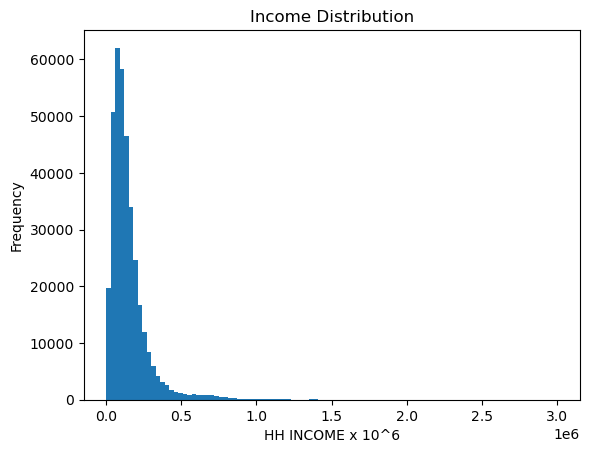

In [53]:
# Create a histogram of the HH Income distribution
plt.hist(data["HHINCOME"],bins=100)
plt.xlabel("HH INCOME x 10^6")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()

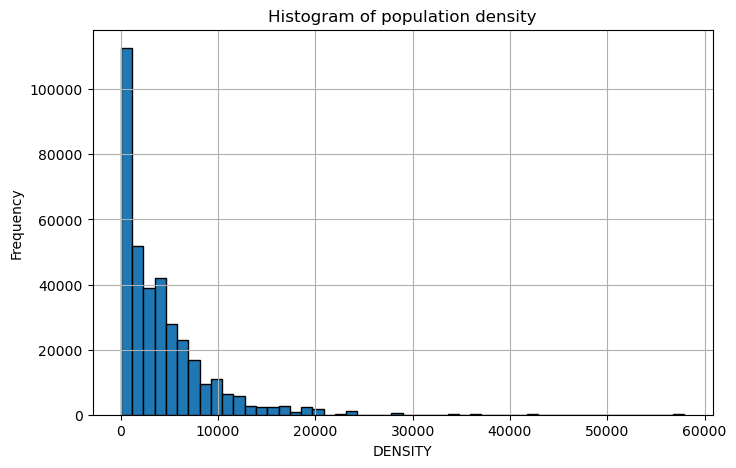

In [54]:
plt.figure(figsize=(8, 5))
plt.hist(data["DENSITY"], bins=50, edgecolor="black")
plt.title("Histogram of population density")
plt.xlabel("DENSITY")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

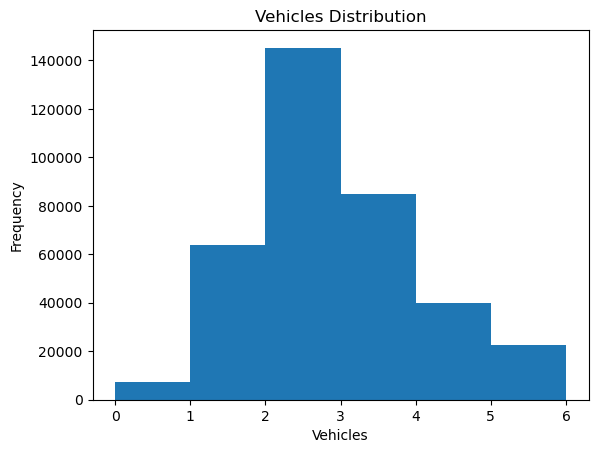

In [55]:
# Create a histogram of the Vehicles owned distribution
plt.hist(data["VEHICLES"],bins=6)
plt.xlabel("Vehicles")
plt.ylabel("Frequency")
plt.title("Vehicles Distribution")
plt.show()

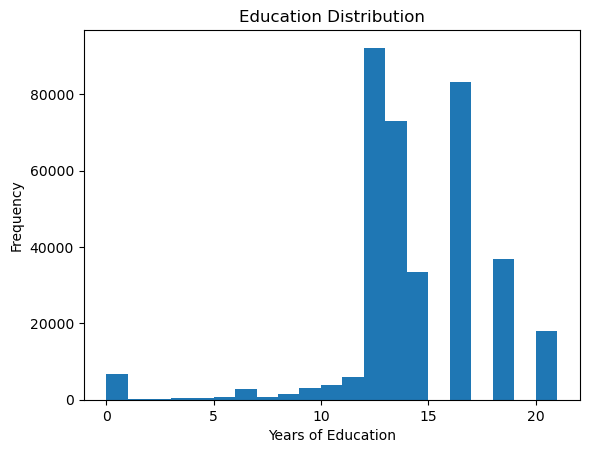

In [56]:
# Create a histogram of the Education distribution
plt.hist(data["EDUC_YEARS"],bins=21)
plt.xlabel("Years of Education")
plt.ylabel("Frequency")
plt.title("Education Distribution")
plt.show()

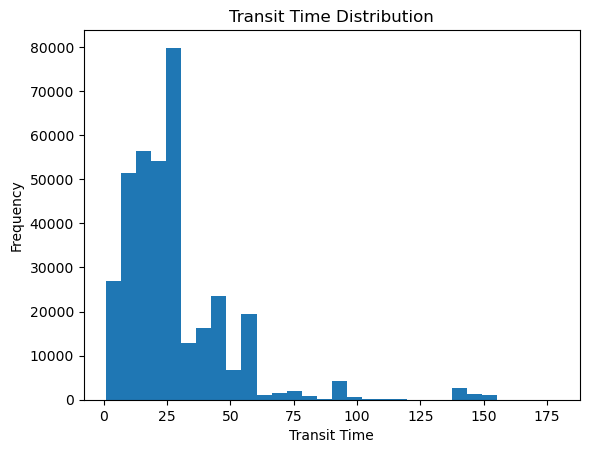

In [57]:
# Create a histogram of the Transit Time distribution
plt.hist(data["TRANTIME"],bins=30)
plt.xlabel("Transit Time")
plt.ylabel("Frequency")
plt.title("Transit Time Distribution")
plt.show()

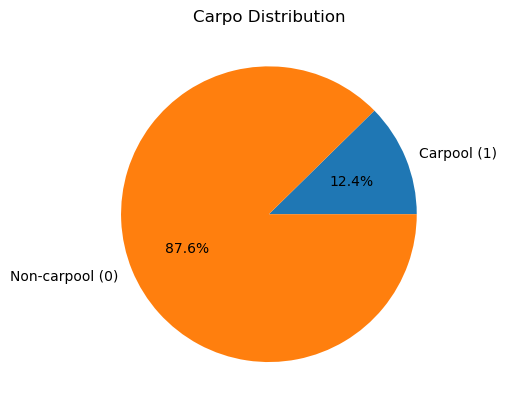

In [58]:
# Count the number of carpoolers and non-carpoolers
carpool_count = (data["CARPOOL"] == 1).sum()
non_carpool_count = (data["CARPOOL"] == 0).sum()

# Create labels for the pie chart
labels = ['Carpool (1)', 'Non-carpool (0)']

# Create a list of counts
carpool_counts = [carpool_count, non_carpool_count]

# Create a pie chart
plt.pie(carpool_counts, labels=labels, autopct='%1.1f%%')
plt.title("Carpo Distribution")
plt.show()

In [59]:
# Actual REGION data with all STATEFIP codes
state_region = pd.DataFrame({
    'STATEFIP': [
        # Northeast
        9, 23, 25, 33, 34, 44, 50, 36, 42,
        # Midwest
        17, 18, 26, 39, 55, 19, 20, 27, 29, 31, 38, 46,
        # South
        1, 5, 10, 11, 12, 13, 21, 22, 24, 28, 37, 40, 45, 47, 48, 51, 54,
        # West
        2, 4, 6, 8, 15, 16, 30, 32, 35, 41, 49, 53, 56
    ],
    'REGION': [
        # Northeast = 1
        1, 1, 1, 1, 1, 1, 1, 1, 1,
        # Midwest = 0
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        # South = 2
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        # West = 3
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3
    ]
})

# STATEFIP to state abbreviations (needed for Plotly)
statefip_to_abbrev = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS',
    21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS',
    29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV',
    55: 'WI', 56: 'WY'
}

state_region['STATE'] = state_region['STATEFIP'].map(statefip_to_abbrev)

# REGION name mapping
region_names = {0: 'Midwest', 1: 'Northeast', 2: 'South', 3: 'West'}
state_region['REGION_NAME'] = state_region['REGION'].map(region_names)

# Plotly Express choropleth map
fig = px.choropleth(
    state_region,
    locations='STATE',
    locationmode='USA-states',
    color='REGION_NAME',
    scope='usa',
    color_discrete_sequence=px.colors.qualitative.Set1,
    title='US Regions by REGION Variable'
)

fig.show()


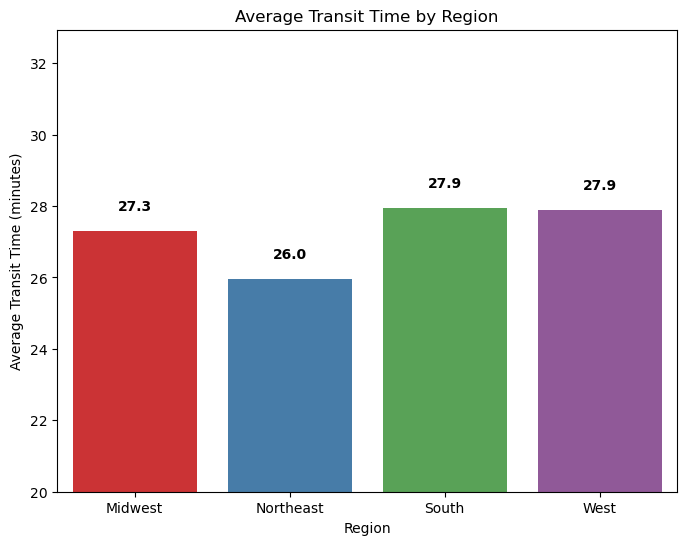

In [60]:
# Group by REGION and calculate mean TRANTIME
avg_trantime = data.groupby('REGION')['TRANTIME'].mean().reset_index()

# Map region numbers back to names
region_names = {0: 'Midwest', 1: 'Northeast', 2: 'South', 3: 'West'}
avg_trantime['REGION_NAME'] = avg_trantime['REGION'].map(region_names)

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=avg_trantime, x='REGION_NAME', y='TRANTIME', palette='Set1')

# Add the actual average transit time numbers on top of each bar
for index, row in avg_trantime.iterrows():
    ax.text(index, row['TRANTIME'] + 0.5, f"{row['TRANTIME']:.1f}", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Zoom in the y-axis to focus on transit times above 20 minutes
plt.ylim(20, avg_trantime['TRANTIME'].max() + 5)

plt.title('Average Transit Time by Region')
plt.xlabel('Region')
plt.ylabel('Average Transit Time (minutes)')
plt.show()

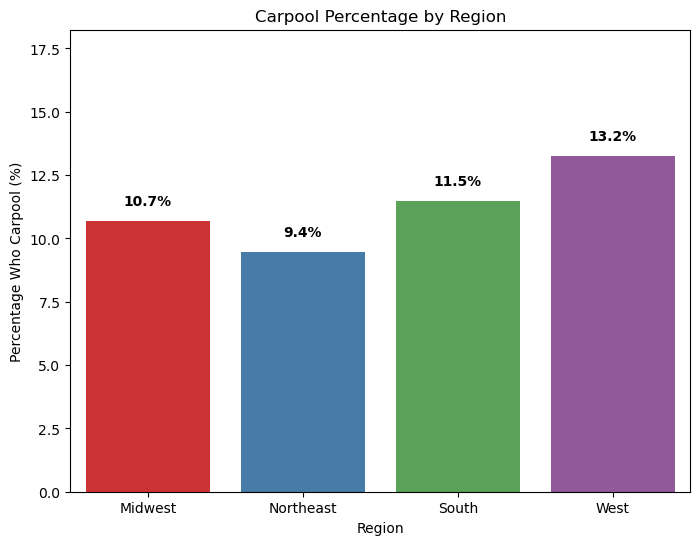

In [61]:
# Map REGION numbers to names again if not done yet
region_names = {0: 'Midwest', 1: 'Northeast', 2: 'South', 3: 'West'}
data['REGION_NAME'] = data['REGION'].map(region_names)

# Calculate carpool percentage by region
carpool_pct = data.groupby('REGION_NAME')['CARPOOL'].mean().reset_index()
carpool_pct['CARPOOL_PCT'] = carpool_pct['CARPOOL'] * 100  # Convert to percent

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=carpool_pct, x='REGION_NAME', y='CARPOOL_PCT', palette='Set1')

# Add % labels on top of each bar
for index, row in carpool_pct.iterrows():
    ax.text(index, row['CARPOOL_PCT'] + 0.5, f"{row['CARPOOL_PCT']:.1f}%", 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Carpool Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Percentage Who Carpool (%)')
plt.ylim(0, carpool_pct['CARPOOL_PCT'].max() + 5)
plt.show()


# Regression model and results (preliminary for proposal just the intuition of the betas and the equation)


In [62]:
# Drop irrelevant columns for the regression from the data
columns_to_drop = ["SAMPLE", "STATEFIP", "EDUC", "EDUCD", "REGION", "REGION_NAME"]
data = data.drop(columns=columns_to_drop, errors='ignore')
data.head()

,YEAR,SERIAL,CBSERIAL,HHWT,CLUSTER,DENSITY,STRATA,GQ,HHINCOME,VEHICLES,PERNUM,PERWT,SEX,AGE,CARPOOL,TRANTIME,EDUC_YEARS,REGION_NAME_Northeast,REGION_NAME_South,REGION_NAME_West
3713,2023,3712,2023000000328,126,2023000037121,238.10,230001,1,111500,3,1,126,2,40,0,75,13.00,0,1,0
3714,2023,3712,2023000000328,126,2023000037121,238.10,230001,1,111500,3,2,146,1,41,0,75,12.00,0,1,0
3715,2023,3712,2023000000328,126,2023000037121,238.10,230001,1,111500,3,3,167,2,20,0,15,13.00,0,1,0
3716,2023,3713,2023000000485,76,2023000037131,96.70,160001,1,57500,2,1,76,2,36,0,10,11.00,0,1,0
3717,2023,3713,2023000000485,76,2023000037131,96.70,160001,1,57500,2,2,89,1,40,0,10,12.00,0,1,0


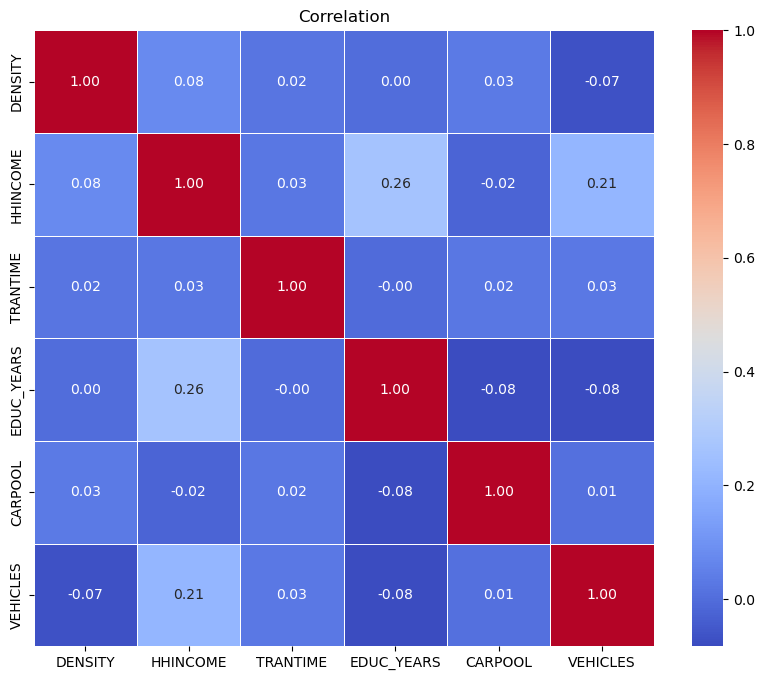

In [63]:
corr_matrix = data[["DENSITY", "HHINCOME", "TRANTIME", "EDUC_YEARS", "CARPOOL","VEHICLES"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation")
plt.show()


In [64]:
m1 = smf.ols(formula="VEHICLES ~ np.log(HHINCOME) + SEX", data=data).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:               VEHICLES   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                 1.968e+04
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:28:43   Log-Likelihood:            -5.6278e+05
No. Observations:              363263   AIC:                         1.126e+06
Df Residuals:                  363260   BIC:                         1.126e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.7568      0.028  

In [65]:
m2 = smf.ols(formula="VEHICLES ~ np.log(HHINCOME)+ SEX + REGION_NAME_Northeast + REGION_NAME_South + REGION_NAME_West", data=data).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:               VEHICLES   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     8119.
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:28:43   Log-Likelihood:            -5.6223e+05
No. Observations:              363263   AIC:                         1.124e+06
Df Residuals:                  363257   BIC:                         1.125e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.81

In [66]:
m3 = smf.ols(formula="VEHICLES ~ np.log(HHINCOME)+ SEX + REGION_NAME_Northeast + REGION_NAME_South + REGION_NAME_West + TRANTIME", data=data).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:               VEHICLES   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     6779.
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:28:44   Log-Likelihood:            -5.6219e+05
No. Observations:              363263   AIC:                         1.124e+06
Df Residuals:                  363256   BIC:                         1.124e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.82

In [67]:
m4 = smf.ols(formula="VEHICLES ~ np.log(HHINCOME)+ SEX + REGION_NAME_Northeast + REGION_NAME_South + REGION_NAME_West + TRANTIME + CARPOOL", data=data).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:               VEHICLES   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     5821.
Date:                Sat, 15 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:28:44   Log-Likelihood:            -5.6216e+05
No. Observations:              363263   AIC:                         1.124e+06
Df Residuals:                  363255   BIC:                         1.124e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.83

In [68]:
stargazer = Stargazer([m1, m2, m3, m4])
stargazer.covariate_order(['Intercept', 'np.log(HHINCOME)', 'SEX',
                            'REGION_NAME_Northeast', 'REGION_NAME_South', 'REGION_NAME_West', 'TRANTIME', 'CARPOOL'])
stargazer.custom_columns(['Model 1','Model 2','Model 3','Model 4'], [1,1,1,1])
display(HTML(stargazer.render_html()))

In [70]:
data["log_HHINCOME"] = np.log(data["HHINCOME"])
X = data[['log_HHINCOME', 'SEX', 'REGION_NAME_Northeast', 'REGION_NAME_South', 
          'REGION_NAME_West', 'TRANTIME', 'CARPOOL']].copy()
X = X.dropna()
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

,Variable,VIF
0,log_HHINCOME,89.44
1,SEX,9.42
2,REGION_NAME_Northeast,4.43
3,REGION_NAME_South,36.39
4,REGION_NAME_West,49.57
5,TRANTIME,2.57
6,CARPOOL,1.14


# F-Test of Significance

In [71]:
# Total number of observations
n = data.shape[0]

# Unrestricted model: with all predictors
ur_model = smf.ols(
    formula="VEHICLES ~ np.log(HHINCOME)+ SEX + REGION_NAME_Northeast + REGION_NAME_South + REGION_NAME_West + TRANTIME + CARPOOL",
    data=data
).fit()
r2_ur = ur_model.rsquared
print(f'R² of unrestricted OLS regression: {r2_ur:.5f}\n')

# Restricted model: only intercept
r_model = smf.ols(formula="VEHICLES ~ 1", data=data).fit()
r2_r = r_model.rsquared
print(f'R² of restricted OLS regression: {r2_r:.5f}\n')

# Number of restrictions = 7 (number of predictors in the unrestricted model)
q = 7

# Compute F-statistic manually
fstat = ((r2_ur - r2_r) / q) / ((1 - r2_ur) / (n - q - 1))
print(f'F-statistic: {fstat:.3f}\n')

# Critical value at 1% level
from scipy import stats
cv = stats.f.ppf(1 - 0.01, q, n - q - 1)
print(f'Critical value at 1% significance level: {cv:.3f}')

# p-value
fpval = 1 - stats.f.cdf(fstat, q, n - q - 1)
print(f'P-value: {fpval:.4f}\n')


R² of unrestricted OLS regression: 0.10085

R² of restricted OLS regression: -0.00000

F-statistic: 5820.688

Critical value at 1% significance level: 2.639
P-value: 0.0000



The F-statistic is 1002.929, which is overwhelmingly larger than the critical value of 3.319 at the 1% significance level. The p-value is 0.0000, indicating a very high level of statistical significance.

This means that we reject the null hypothesis that the coefficients on the explanatory variables are jointly insignificant. The variables log(DENSITY), log(HHINCOME), EDUC_YEARS, and CARPOOL are jointly significant in explaining the variation in commuting time (log(TRANTIME)). 

# Result

In Model 1, we include the logarithm of household income and a binary variable for sex. The coefficient on log(HHINCOME) is 0.467 (p < 0.01), indicating that a 1% increase in household income is associated with an approximate 0.00467 increase in vehicle ownership. The coefficient on SEX is negative and significant at the 1% level (-0.064), suggesting that households with female respondents tend to own fewer vehicles, holding income constant.

Model 2 extends the specification by including region fixed effects (Northeast, South, West, with Midwest as the omitted category). Regional variation is statistically significant: compared to the Midwest, households in the Northeast and South own fewer vehicles (coefficients: -0.231 and -0.047, respectively), while households in the West own slightly more (+0.026). All coefficients are statistically significant at the 1% level.

In Model 3, we control for commute time (TRANTIME). The coefficient on TRANTIME is small but positive and statistically significant (0.0006, p < 0.01), implying that households with longer average commute times are marginally more likely to own additional vehicles, all else equal.

Model 4 includes all prior variables plus a carpooling indicator (CARPOOL). The coefficient on CARPOOL is negative (-0.0046) but not statistically significant (p = 0.145), suggesting that after controlling for income, region, and commute time, carpooling behavior is not a significant predictor of the number of household vehicles.

The R-squared values increase across models: from 0.103 in Model 1 to 0.133 in Model 4, reflecting improved model fit as more covariates are introduced.

A joint F-test on all explanatory variables in Model 4 yields an F-statistic of 21,013.44 (p < 0.0001), well above the critical value at the 1% level (2.639), allowing us to reject the null hypothesis that the coefficients are jointly insignificant.

To check for multicollinearity, we compute Variance Inflation Factors (VIFs). Most variables fall well below the conventional threshold of 10, though log(HHINCOME) and SEX have moderately elevated VIFs of 14.19 and 9.22, respectively. While this may indicate some collinearity, it does not appear to distort the model substantially.

Overall, the results suggest that household income, regional location, and commuting behavior are significant predictors of vehicle ownership.